# Lead Scoring 

### Problem Statement

The company X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google and the people who land on the website might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now the company wishes to identify the most potential leads, also known as ‘Hot Leads’ the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. To make this process effective let's build logistic regression model, the conversion predictions and evaluation metrics to achieve this.

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To handle warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
# importing the data
df_leads = pd.read_csv('E:\Leads.csv')

# To keep an original copy
df_leads_original = df_leads.copy()

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Data

In [5]:
# # knowing the total rows and columns of the dataframe
df_leads.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [8]:
# substituiting 'select' with NaN to skip wrong interpretations
df_leads = df_leads.replace('Select',np.nan)

In [9]:
# let's drop variables with only one class as such columns don't part in the analysis
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# dropping all the columns with one unique class
df1= df_leads.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [11]:
# We can delete 'Loan Number' & 'Prospext ID' columns as they have unique data through out the length which are only serial numbers
df1= df1.drop(['Lead Number','Prospect ID'],axis=1)

In [12]:
# checking the missing value percentages in the columns
round(100*(df1.isnull().mean()), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
# Removing all the columns that are no required and have 35% null values 
df2 = df1.drop(['How did you hear about X Education','Tags', 'Asymmetrique Activity Index','Lead Profile','City', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Better Career Prospects,No,No,No,No,No,No,Low in Relevance,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,Might be,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Better Career Prospects,No,No,No,No,No,No,Not Sure,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Better Career Prospects,No,No,No,No,No,No,Might be,No,Modified


Though "Specialization" & "Lead Quality" columns have more than 35% missing values we aren't dropping them as they have important data that might give strength to the analysis.

In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().mean()), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [15]:
# We are replacing the 'null' values with 'not provided' for the below columns
## We will be droping these columns later if we find that these columns are not significant for our analysis.

df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [16]:
# function for checking the percentage in plots
def percent_plot(var):
    values = (df2[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

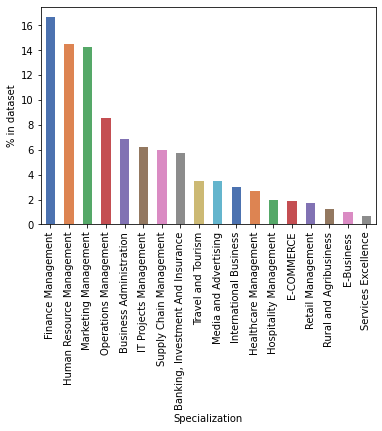

In [17]:
# For 'Specialization'
percent_plot('Specialization')

In [18]:
# As there are a lot of different specializations and it's not accurate to directly impute with the mean, let's update the null values with new keyword 'others.'
df2['Specialization'] = df2['Specialization'].replace(np.nan, 'Others')

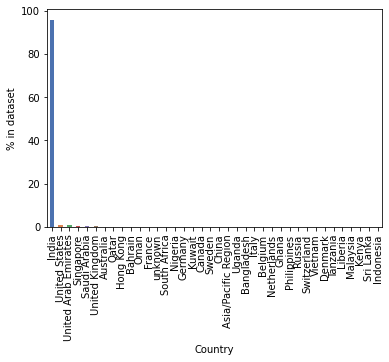

In [19]:
# For 'Country'
percent_plot('Country')

In [20]:
# updating the null values with India as it is the most frequent value.
df2['Country'] = df2['Country'].replace(np.nan, 'India')

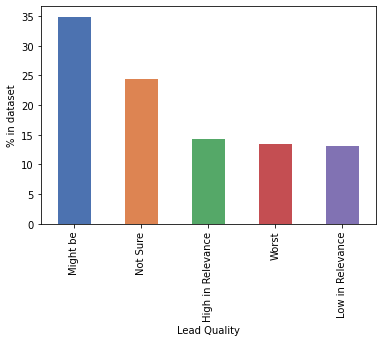

In [21]:
# For Lead Quality
percent_plot('Lead Quality')

In [22]:
# considering 'Not Sure' for filling the null values as it can be interpret that not opting anything may be the customer is "Not Sure"
df2['Lead Quality'] = df2['Lead Quality'].replace(np.nan, 'Not Sure')

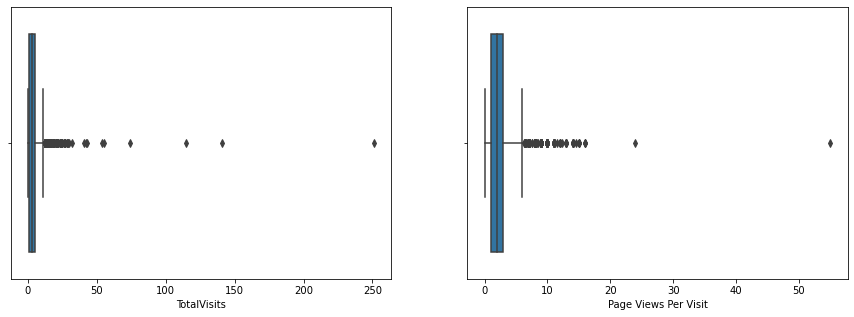

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [23]:
# let's check what to be imputed for null values in numerical variables.

visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df2[var])
plt.show()

df2[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

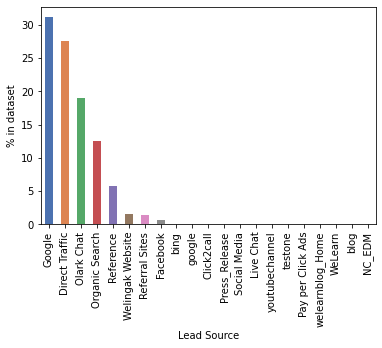

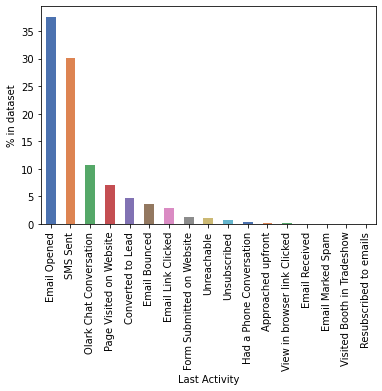

In [24]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [25]:
# To drop the rows containing missing values
df2.dropna(inplace = True)

In [26]:
# To get percentage of null values in each column
round(100*(df2.isnull().mean()), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [27]:
#undedrstanding the data after data cleaning
df2.shape

(9074, 22)

The data cleaning and manipulating part is done, from 37 variables we filtered it to 22 and from 9240 rows we slipped to 9074 where the data spilled is aroung 1.79% which doesn't have much impact in the analysis.

### Exploratory Data Analysis (EDA)

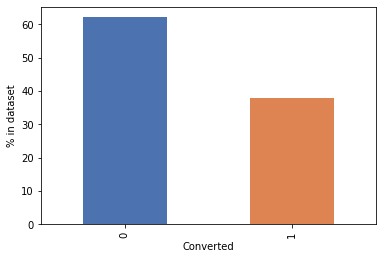

In [28]:
# For the target variable 'Converted'
percent_plot('Converted')

In [29]:
(sum(df2['Converted'])/len(df2['Converted'].index))*100

37.85541106458012

- In this data set 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

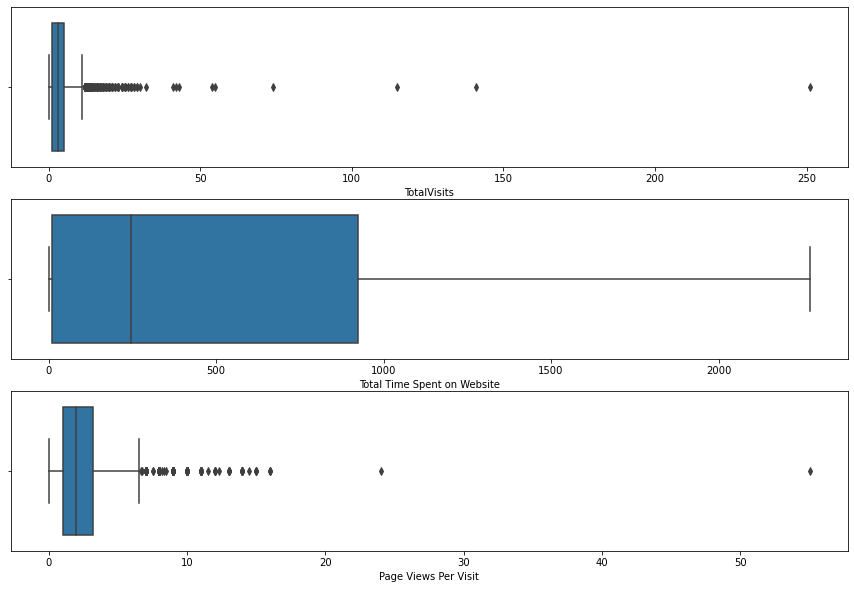

In [30]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df2[var])
plt.show()

In [31]:
df2[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


In [32]:
# Outlier treatment

## For 'Total Visits' & 'Page views per visit' we can cap the columns at 95% value.
percentile = df2['TotalVisits'].quantile([0.95]).values
df2['TotalVisits'][df2['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df2['Page Views Per Visit'].quantile([0.95]).values
df2['Page Views Per Visit'][df2['Page Views Per Visit'] >= percentile[0]] = percentile[0]

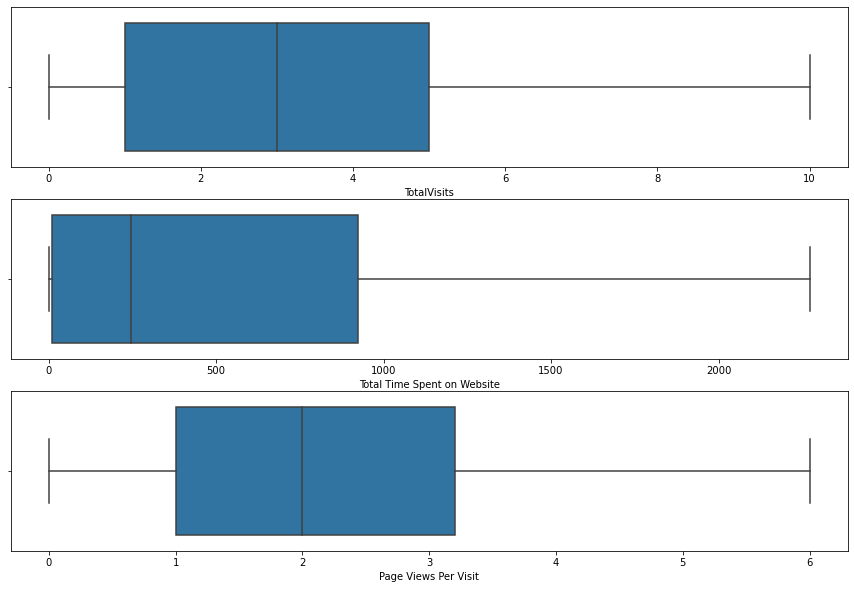

In [33]:
# Ploting Boxplots after outliers handling
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df2[var])
plt.show()

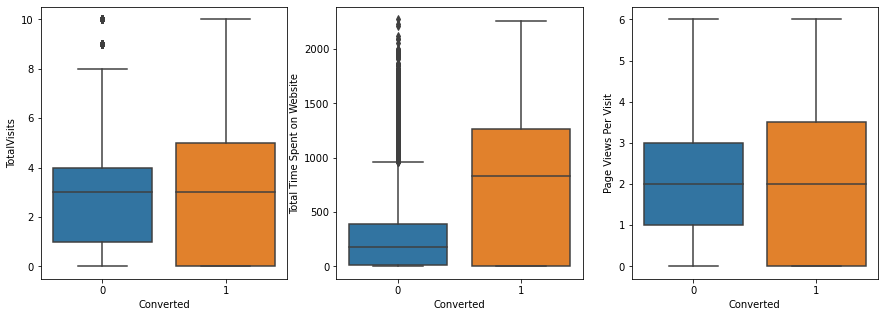

In [34]:
#Ploting numerical variables against target variable

plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df2)
plt.show()

- Observation - People spending more time on the website are more likely to be converted and has major observation rather than the total vists and page views per vist

In [35]:
# Functions to plot countplots for categorical variables with target variable

def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df2)
    plt.xticks(rotation = 90)
    plt.show()

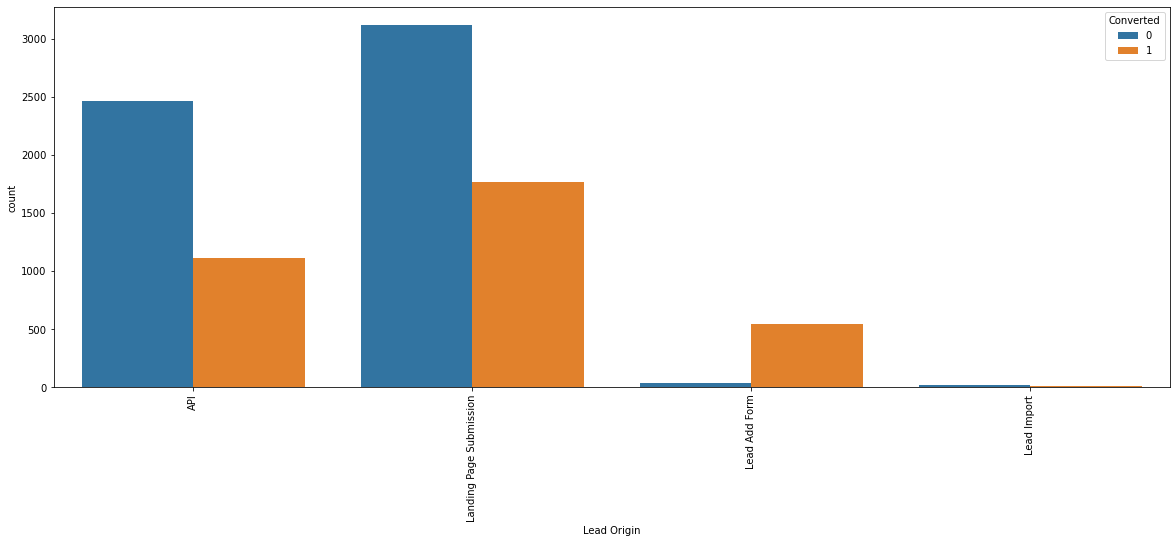

In [36]:
plot_cat_var('Lead Origin')

- __Observations:__'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. 
<br><br>
- __Analysis:__<br> 1. We should try to increase conversion rate for 'API' and 'Landing Page Submission' <br>2. Increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

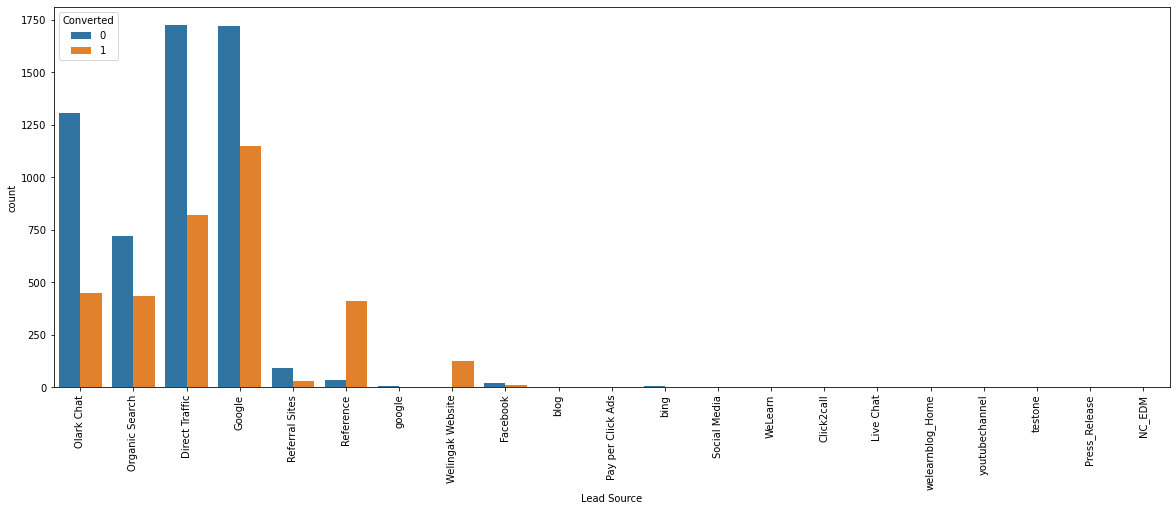

In [37]:
plot_cat_var('Lead Source')

As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.

In [38]:
categories = df2['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [39]:
# To reduce categories
df2['Lead Source'] = df2['Lead Source'].replace(categories[9:], 'Others')

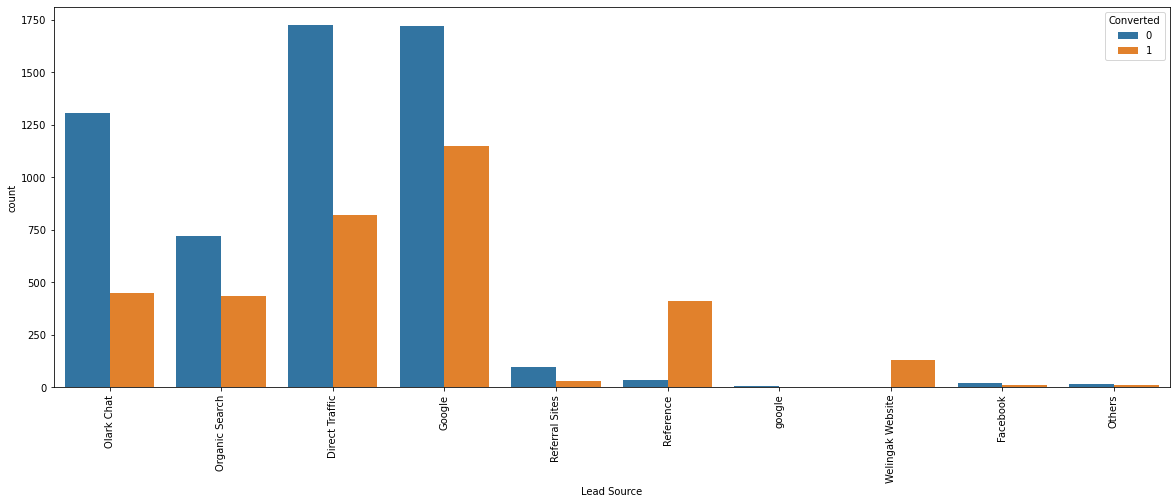

In [40]:
plot_cat_var('Lead Source')

- Observation: 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'

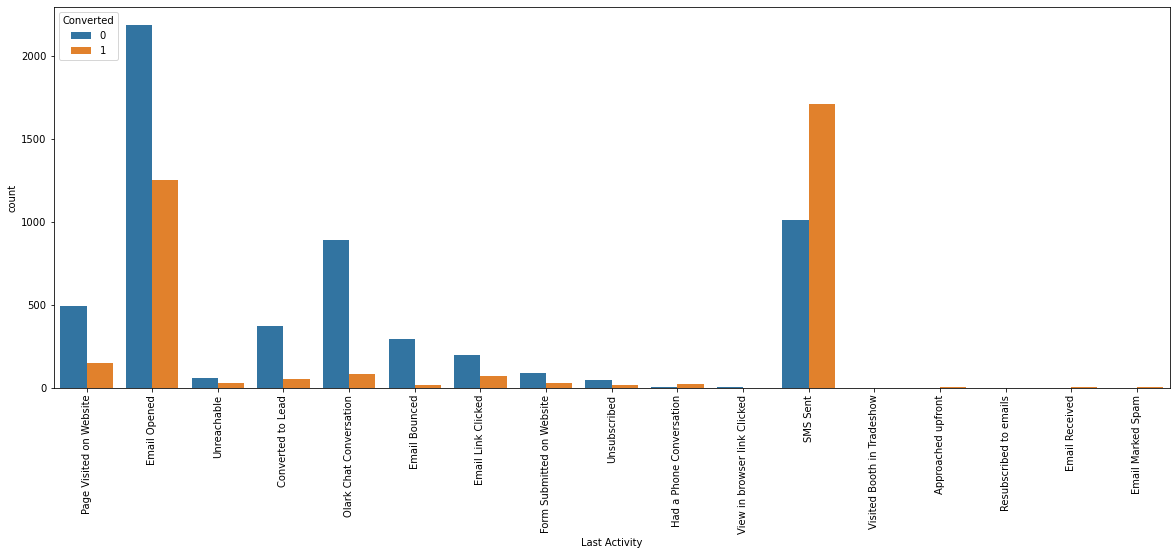

In [41]:
plot_cat_var('Last Activity')

- Observation - Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.

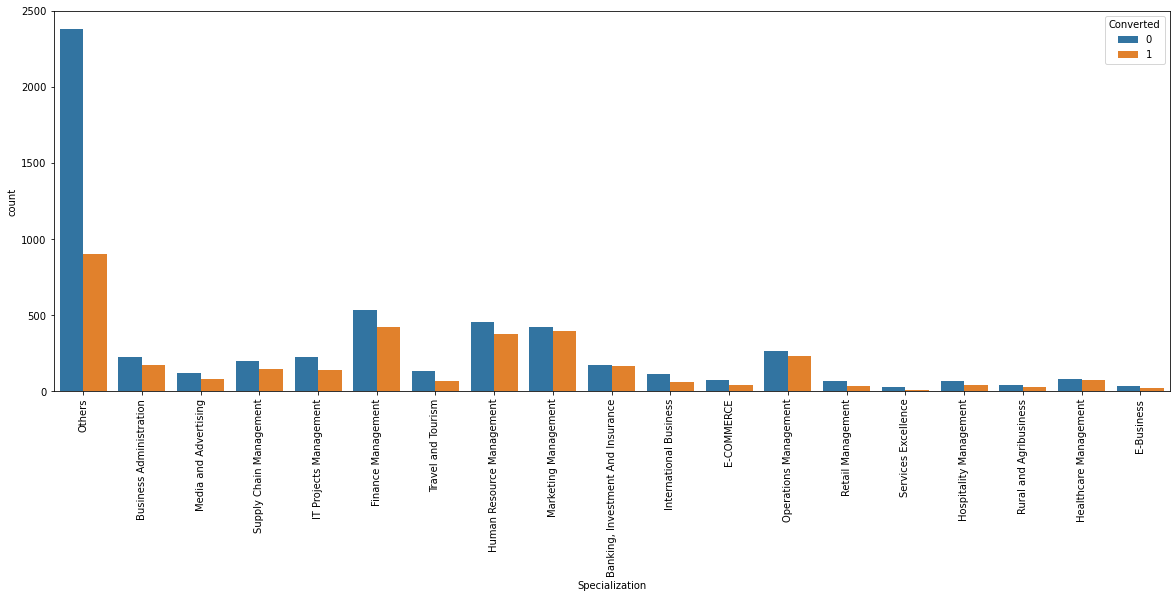

In [42]:
plot_cat_var('Specialization')

Observation : Got no relevent observation. Conversation rate is almost same in the ratio of total leads generated for different specialization streams. 

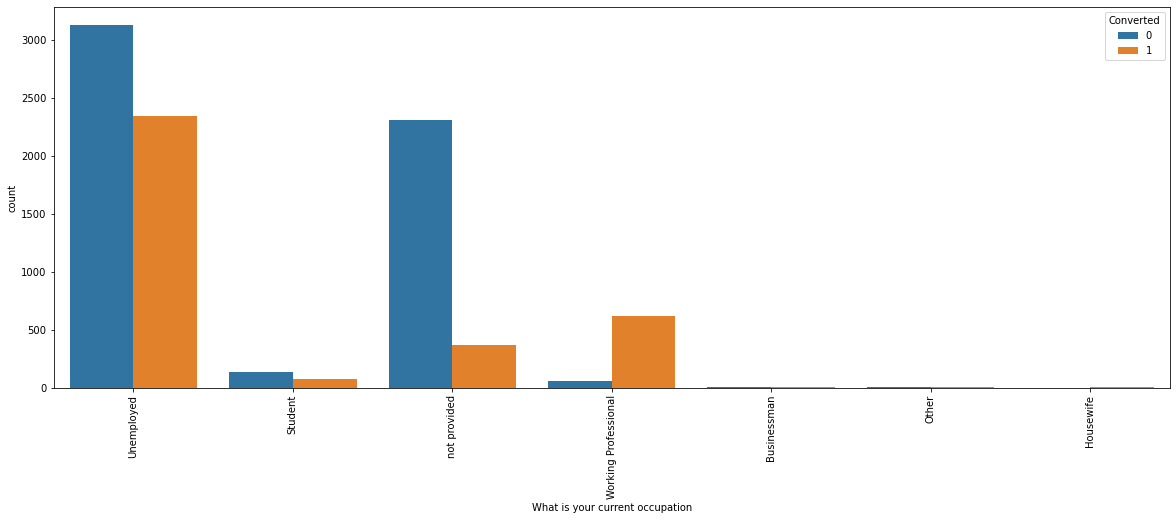

In [43]:
plot_cat_var('What is your current occupation')

 Observation: Convertion rate is very high for the working professionals

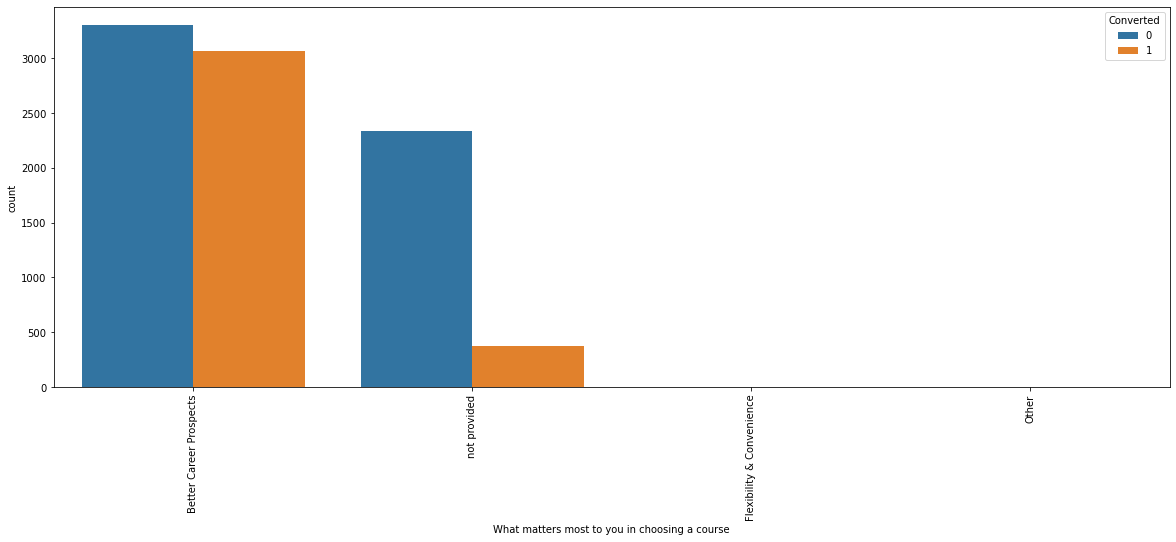

In [44]:
plot_cat_var('What matters most to you in choosing a course')

Observation: Leads generated and Convertion rate is very high for 'Better career Prospects'

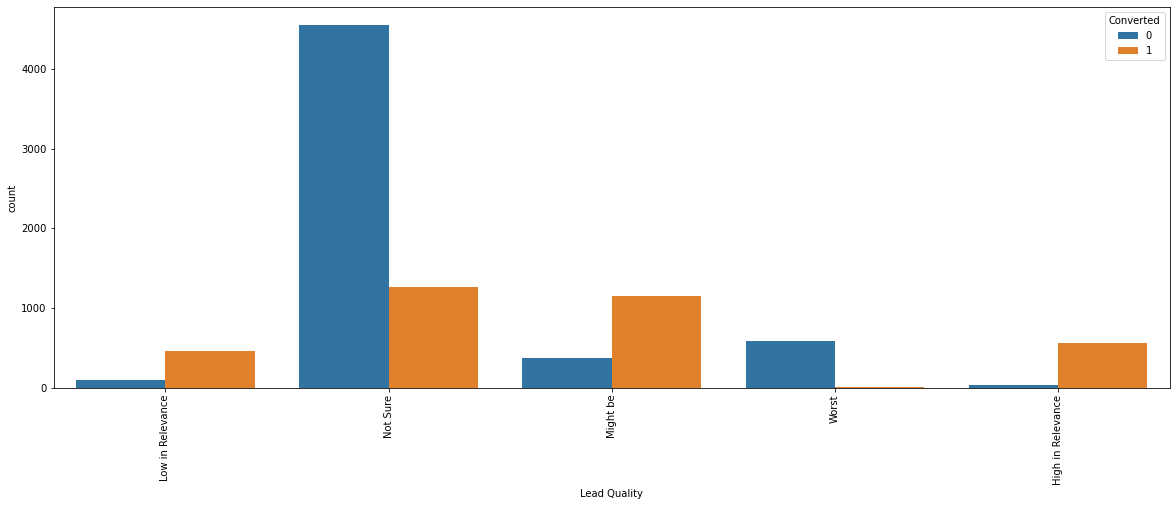

In [45]:
plot_cat_var('Lead Quality')

Observation: 
- As expected a huge amount of convertion rate can be seen from people marked as 'Might be' & 'High relevence'. And low convertion rate can be noticed in 'Worst' marked data.
- Suprisingly we can see a good convertion rate for the 'Low Relevance' marked people.

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [46]:
df3 = df2.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],1)

In [47]:
# Final dataframe
df3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Low in Relevance,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Not Sure,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Might be,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Not Sure,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Might be,Modified


In [48]:
df3.shape

(9074, 12)

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Lead Quality                     9074 non-null   object 
 11  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64

In [50]:
df3.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


#### Data Preparation

In [51]:
# Converting some binary variables (Yes/No) to 0/1
df3['Do Not Email'] = df3['Do Not Email'].map({'Yes': 1, 'No': 0})

In [52]:
#For categorical variables with multiple levels, we create dummy features 
## Categorical variables
cat_var = list(df3.columns[df3.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Lead Quality',
 'Last Notable Activity']

In [53]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df3[cat_var], drop_first=True)

# To add result to the original dataframe
df3 = pd.concat([df3, dummy], axis=1)

# To drop the original variables
df3 = df3.drop(cat_var,1)

In [54]:
df3.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Test-Train Split 

In [55]:
# Importing required package
from sklearn.model_selection import train_test_split

In [56]:
# To put feature variable to X
X = df3.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
# To put response variable to y
y = df3['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [59]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [62]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
# To check the conversion rate
conversion = (sum(df3['Converted'])/len(df3['Converted'].index))*100
conversion

37.85541106458012

We have 37.85% conversion rate

- Building the Model
<br>After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.

### Feature Selection using RFE

In [64]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
# To check output of RFE
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False])

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Others', False, 18),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 42),
 ('Last Activity_Converted to Lead', False, 7),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Marked Spam', False, 35),
 ('Last Activity_Email Opened', False, 54),
 ('Last Activity_Email Received', False, 53),
 ('Last Activity_Form Submitted on Website', False, 47),
 ('Last Activity_Had a Phone Conver

In [68]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [69]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [71]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [72]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [73]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

Model 1:

In [74]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2131.3
Date:                Tue, 18 Oct 2022   Deviance:                       4262.7
Time:                        18:03:03   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

Model 2:

In [75]:
# checking VIF for model-1
check_VIF(X1)

,Features,VIF
11,Lead Quality_Not Sure,2.09
13,Last Notable Activity_Modified,1.82
7,Last Activity_SMS Sent,1.74
3,Lead Source_Olark Chat,1.72
10,Lead Quality_Might be,1.70
2,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.56
4,Lead Source_Welingak Website,1.36
8,What is your current occupation_Working Profes...,1.35
1,Total Time Spent on Website,1.32


Model 2:

In [76]:
# dropping the 'Last Activity_Had a Phone Conversation' as p value is presented and VIF for model-1 are within the limit.
col1 = col.drop('Last Activity_Had a Phone Conversation',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2134.0
Date:                Tue, 18 Oct 2022   Deviance:                       4268.1
Time:                        18:03:03   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [77]:
# checking VIF for model-2
check_VIF(X2)

,Features,VIF
10,Lead Quality_Not Sure,2.09
12,Last Notable Activity_Modified,1.82
6,Last Activity_SMS Sent,1.73
3,Lead Source_Olark Chat,1.72
9,Lead Quality_Might be,1.69
2,Lead Origin_Lead Add Form,1.61
5,Last Activity_Olark Chat Conversation,1.56
4,Lead Source_Welingak Website,1.36
7,What is your current occupation_Working Profes...,1.35
1,Total Time Spent on Website,1.31


Model 3:

In [78]:
# dropping the 'Last Notable Activity_Unreachable' as p value is presented and VIF for model-2 are within the limit.
col2 = col1.drop('Last Notable Activity_Unreachable',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2137.3
Date:                Tue, 18 Oct 2022   Deviance:                       4274.7
Time:                        18:03:03   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All of the features have p-value zero i.e. they all seem significant.

In [79]:
# checking VIF for model-3
check_VIF(X3)

,Features,VIF
10,Lead Quality_Not Sure,2.08
12,Last Notable Activity_Modified,1.82
6,Last Activity_SMS Sent,1.73
3,Lead Source_Olark Chat,1.72
9,Lead Quality_Might be,1.69
2,Lead Origin_Lead Add Form,1.61
5,Last Activity_Olark Chat Conversation,1.56
4,Lead Source_Welingak Website,1.36
7,What is your current occupation_Working Profes...,1.35
1,Total Time Spent on Website,1.31


<AxesSubplot:>

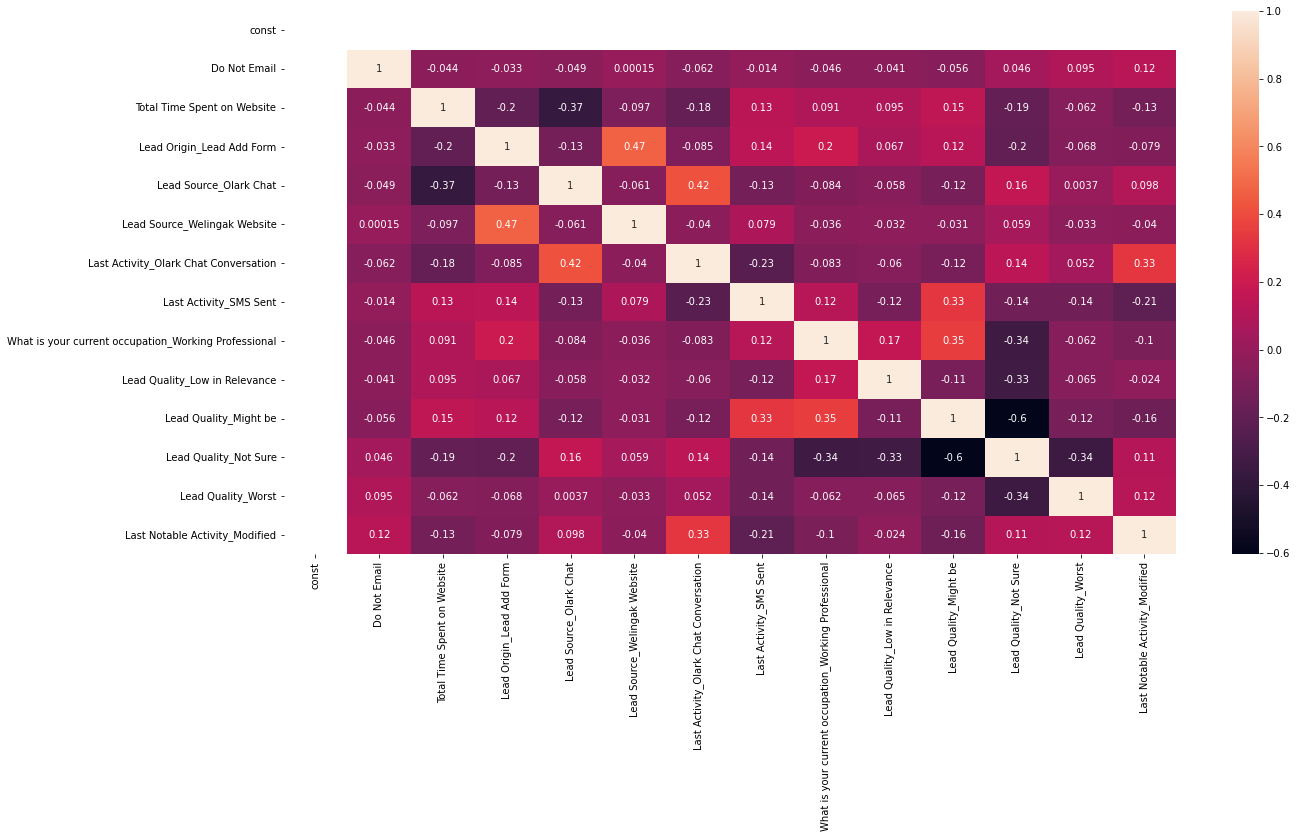

In [80]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X3.corr(),annot = True)

- From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF.
- We do not need to drop any more variables and we can proceed with making predictions using this model only.

In [81]:
# To get predicted values on train set
y_train_pred_final = get_pred(X3,logm3)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.116526,3009,0
1,0,0.117968,1012,0
2,0,0.287521,9226,0
3,1,0.767704,4750,1
4,1,0.673934,7987,1


In [82]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3540  365]
 [ 612 1834]]
Training Accuracy:  0.846165958116832


__This is our final model:__

- All p-values are zero.
- VIFs for all features are very low. There is hardly any multicollinearity present.
- Training accuracy of 84.61% at a probability threshold of 0.5 is also very good.

In [83]:
other_metrics(confusion)

Sensitivity:  0.749795584627964
Specificity:  0.9065300896286812
False postive rate - predicting the lead conversion when the lead does not convert:  0.09346991037131883
Positive predictive value:  0.8340154615734425
Negative predictive value:  0.8526011560693642


## Plotting the ROC Curve

In [84]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

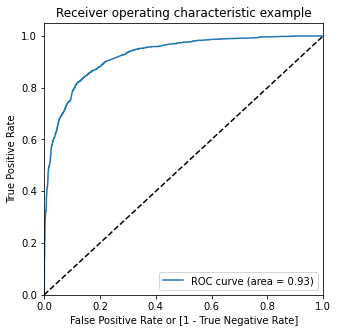

In [86]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [87]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9250577126626555


 Area under curve (auc) is approximately 0.925 which is very close to ideal auc of 1.

## Finding Optimal Cutoff Point

In [88]:
# For creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.116526,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.117968,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.287521,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.767704,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.673934,7987,1,1,1,1,1,1,1,1,0,0,0


In [89]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.713903  0.968111  0.554673
0.2   0.2  0.795780  0.929272  0.712164
0.3   0.3  0.842072  0.863451  0.828681
0.4   0.4  0.854511  0.825429  0.872727
0.5   0.5  0.846166  0.749796  0.906530
0.6   0.6  0.844749  0.709321  0.929577
0.7   0.7  0.831995  0.636141  0.954673
0.8   0.8  0.818454  0.570319  0.973880
0.9   0.9  0.777830  0.444399  0.986684


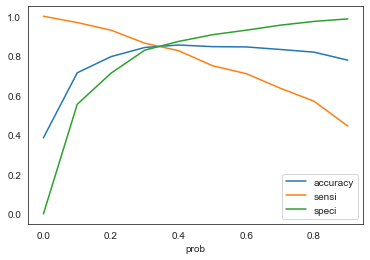

In [90]:
# Plotting accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, __0.35 is the optimum point to take as a cutoff probability__.

In [91]:
# Using 0.35 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.116526,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.117968,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.287521,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.767704,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.673934,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [92]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3340  565]
 [ 386 2060]]
Training Accuracy:  0.8502598016060463


In [93]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8421913327882257
Specificity:  0.8553137003841229
False postive rate - predicting the lead conversion when the lead does not convert:  0.1446862996158771
Positive predictive value:  0.7847619047619048
Negative predictive value:  0.8964036500268384


In [94]:
# Precision = TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7847619047619048

In [95]:
# Recall = TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8421913327882257

In [96]:
# Precision and Recall Tradeoff
## importing necessary library

from sklearn.metrics import precision_recall_curve

In [97]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

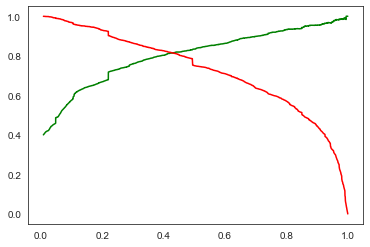

In [99]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, __0.4 is the optimum point to take as a cutoff probability using Precision-Recall.__ We can check our accuracy using this cutoff too.

In [100]:
# Using 0.40 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.116526,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.117968,1012,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.287521,9226,0,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.767704,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.673934,7987,1,1,1,1,1,1,1,1,0,0,0,1,1


In [101]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3408  497]
 [ 427 2019]]
Training Accuracy:  0.8545111006140765


In [102]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.8254292722812756
Specificity:  0.8727272727272727
False postive rate - predicting the lead conversion when the lead does not convert:  0.12727272727272726
Positive predictive value:  0.8024642289348172
Negative predictive value:  0.8886571056062581


In [103]:
# Precision = TP / TP + FP
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8024642289348172

In [104]:
# Recall = TP / TP + FN
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8254292722812756

## Making Prediction on Test Set

In [105]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# To get final features
X_test_sm = X_test[col2]

In [107]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [108]:
# Making predictions
y_test_pred = logm3.predict(X_test_sm)

y_test_pred[:10]

3271    0.075974
1490    0.991663
7936    0.065056
4216    0.839237
3830    0.076968
1800    0.868673
6507    0.212101
4821    0.191122
4223    0.994282
4714    0.289755
dtype: float64

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.075974
1490,0.991663
7936,0.065056
4216,0.839237
3830,0.076968


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [112]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.075974
1,1,1490,0.991663
2,0,7936,0.065056
3,1,4216,0.839237
4,0,3830,0.076968


In [114]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.075974
1,1,1490,0.991663
2,0,7936,0.065056
3,1,4216,0.839237
4,0,3830,0.076968


In [115]:
# To put the threshold of 0.4 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.075974,0
1,1,1490,0.991663,1
2,0,7936,0.065056,0
3,1,4216,0.839237,1
4,0,3830,0.076968,0


In [116]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9139890001084596


In [117]:
# Confusion matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion_test

array([[1507,  227],
       [ 192,  797]], dtype=int64)

In [118]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.8461255967682703

In [119]:
# Precision = TP / TP + FP
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7783203125

In [120]:
# Recall = TP / TP + FN
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8058645096056622

In [121]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8058645096056622
Specificity:  0.8690888119953863
False postive rate - predicting the lead conversion when the lead does not convert:  0.1309111880046136
Positive predictive value:  0.7783203125
Negative predictive value:  0.886992348440259


##### With probability threshold cutoff of 0.4 we got a Recall of 80.58% and Precision of 77.83% which is a good.

## Assigning Lead Score

In [122]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.075974,0
1,1,1490,0.991663,1
2,0,7936,0.065056,0
3,1,4216,0.839237,1
4,0,3830,0.076968,0


In [123]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.116526,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.117968,1012,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.287521,9226,0,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.767704,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.673934,7987,1,1,1,1,1,1,1,1,0,0,0,1,1


In [124]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.116526,0
1,1012,0,0.117968,0
2,9226,0,0.287521,0
3,4750,1,0.767704,1
4,7987,1,0.673934,1


In [125]:
# To concatenate 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.116526,0
1,1012,0,0.117968,0
2,9226,0,0.287521,0
3,4750,1,0.767704,1
4,7987,1,0.673934,1


In [126]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [127]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [128]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.116526,0,12
1,1012,0,0.117968,0,12
2,9226,0,0.287521,0,29
3,4750,1,0.767704,1,77
4,7987,1,0.673934,1,67


In [129]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.641912,1,64
1,0,0.187225,0,19
2,1,0.883006,1,88
3,0,0.043907,0,4
4,1,0.717449,1,72


In [130]:
# To get Lead Number column from original data
leads_original = df_leads_original[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [131]:
# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.641912,1.0,64.0
1,660728,0.0,0.187225,0.0,19.0
2,660727,1.0,0.883006,1.0,88.0
3,660719,0.0,0.043907,0.0,4.0
4,660681,1.0,0.717449,1.0,72.0


In [132]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm3.params[1:]
new_params

Do Not Email                                           -1.40
Total Time Spent on Website                             1.10
Lead Origin_Lead Add Form                               2.62
Lead Source_Olark Chat                                  1.56
Lead Source_Welingak Website                            3.73
Last Activity_Olark Chat Conversation                  -0.85
Last Activity_SMS Sent                                  1.24
What is your current occupation_Working Professional    1.83
Lead Quality_Low in Relevance                          -1.38
Lead Quality_Might be                                  -2.34
Lead Quality_Not Sure                                  -4.11
Lead Quality_Worst                                     -6.25
Last Notable Activity_Modified                         -0.88
dtype: float64

In [133]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -37.46
Total Time Spent on Website                              29.41
Lead Origin_Lead Add Form                                70.34
Lead Source_Olark Chat                                   41.69
Lead Source_Welingak Website                            100.00
Last Activity_Olark Chat Conversation                   -22.66
Last Activity_SMS Sent                                   33.30
What is your current occupation_Working Professional     49.00
Lead Quality_Low in Relevance                           -37.09
Lead Quality_Might be                                   -62.84
Lead Quality_Not Sure                                  -110.08
Lead Quality_Worst                                     -167.67
Last Notable Activity_Modified                          -23.59
dtype: float64

In [134]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Total Time Spent on Website                             10
Lead Origin_Lead Add Form                                9
Lead Source_Olark Chat                                   0
Lead Source_Welingak Website                             8
Last Activity_Olark Chat Conversation                   12
Last Activity_SMS Sent                                   5
What is your current occupation_Working Professional     1
Lead Quality_Low in Relevance                            6
Lead Quality_Might be                                    3
Lead Quality_Not Sure                                    7
Lead Quality_Worst                                       2
Last Notable Activity_Modified                           4
dtype: int64

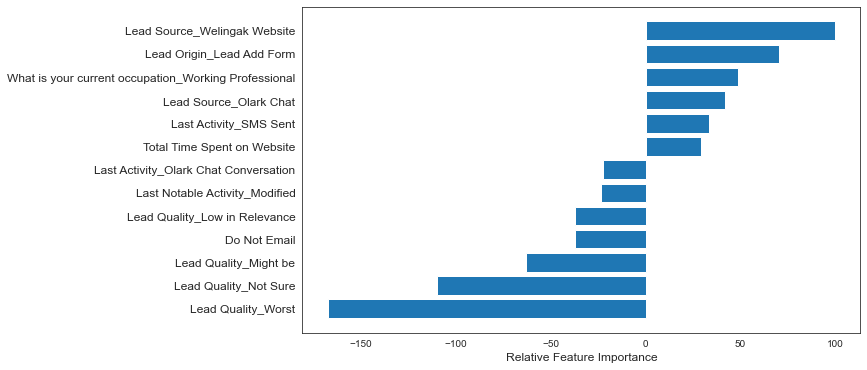

In [135]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col2].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

###  Conclusion

##### Final Observations:

With Probability cutoff of 0.4 on train set we got the following:
* Accuracy : 85.45% 
* Recall : 82.54% 
* Precision : 80.24% 

With Probability cutoff of 0.4 on test set we got the following:
* Accuracy : 84.61%
* Recall : 80.58%
* Precision : 77.83%

### Recommendations

- __The positive features that a lead converts into hot leads are the following:__
 <br>Leads sourced from Welingak Website.<br>
Leads origined from Lead Add Form.<br>
Leads whose current occupation is Working Professional.<br>
Leads sourced from Olark Chat.<br>
Whose last activity is SMS sent.<br>
Leads who spend most time on the website.<br>


- __The negative features that have impact on conversion rate:__
    <br>Leads marked by the assigned employee as Worst Quality. <br>
   Leads marked by the assigned employee as Not Sure.<br>
   Leads marked by the assigned employee as Might be.<br>
   Customers opted not to be emailed about the course (Do Not Email). <br>
   Leads marked by the assigned employee as Low in Relevance.<br>
   If the Last Notable Activity by the student is Modified. <br>
   If the Last activity performed by the customer is Olark Chat Conversation. <br>

#### The X Education can increase the lead conversion rate by focusing the above factors and improving the negative impacting factors towards the positive approach. The company can increase the target lead conversion rate to be around 80% by using the model with threshold of 0.4 as per the CEO's inclination.